In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import os
import scipy.stats
#import corner
from mpl_toolkits import mplot3d

plt.style.use('seaborn-whitegrid')

np.random.seed(2) #Número aleatorio para que los procesos se asimilen.

In [3]:
v = np.load('fit_ejercise.npy')
v

array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
         3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
         1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
         1.00444563, -0.02239716,  0.35714018,  0.

In [8]:
#Ecuación de la recta en 3D
def recta(x, a, b):
    return a * x + b

#La función del logaritmo del likelihood:
def chisq(parametros, data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = recta(x, parametros[0], parametros[1])
    chisq = (y - model) ** 2 / y_err ** 2
    return chisq.sum()

In [17]:
N = 10000
caminos = 1 #Que sea j el número de caminos.
sigma = 0.2
a_inicial = []
b_inicial = []
lh_inicial = []

#Valor inicial de parámetros:
for i in range(caminos):
    a_inicial.append(np.random.normal(-2, sigma))
    b_inicial.append(np.random.normal(8, sigma))
    #Valor inicial del likelihood:
    lh_inicial.append(chisq([a_inicial[i], b_inicial[i]], [v[0], v[1], v[2]]))

#Arreglos donde se guardarán los valores de a, b, likelihood:
#a = [range(N) for i in range(caminos)]
a = []
b = []
lh = []

#Se guardan los primeros valores propuestos:
for i in range(caminos):
    a.append([a_inicial[i]])
    b.append([b_inicial[i]])
    lh.append([lh_inicial[i]])

In [18]:
k = 0

for j in range(caminos):
    for i in range(N):
        a_aux = np.random.normal(a[j][k], sigma)#Se generan dos valores random, no importa la distribución en rango [0,10].
        b_aux = np.random.normal(b[j][k], sigma)
        lh_aux = chisq([a_aux, b_aux], [v[0], v[1], v[2]]) #Primer comparación para actualización de likelihood.
        if lh_aux < lh_inicial[j]: #La maximización del likelihood equivale a la minimización de chi square.
            #Si se cumple la condición, se agregan a, b y se actualiza el valor del likelihood.
            a[j].append(a_aux)
            b[j].append(b_aux)
            lh[j].append(lh_aux)
            lh_inicial[j] = lh_aux
            k += 1
        else:
            comparador = np.random.uniform(0, 1)
            if (lh_aux - lh_inicial[j]) < comparador:
                a[j].append(a_aux)
                b[j].append(b_aux)
                lh[j].append(lh_aux)
                lh_inicial[j] = lh_aux #En esta parte tengo duda, se acepta el valor, pero... ¿se actualiza lh?
                k += 1
            else:
                continue
    k = 0

In [19]:
#El mínimo chi square está en:
parametros = []
for i in range(caminos):
    parametros.append(np.where(lh[i] == np.min(lh[i])))
parametros

[(array([24]),)]

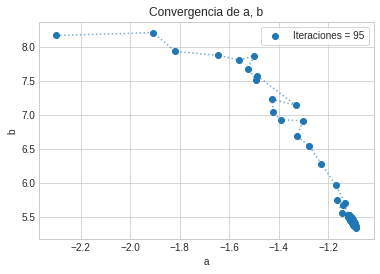

In [20]:
plt.title('Convergencia de a, b')
for i in range(caminos):
    plt.scatter(a[i], b[i], label = 'Iteraciones = {0}'.format(len(a[i])))
    plt.plot(a[i], b[i], linestyle = ':', alpha = 0.6)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.legend(frameon = True)
plt.show()

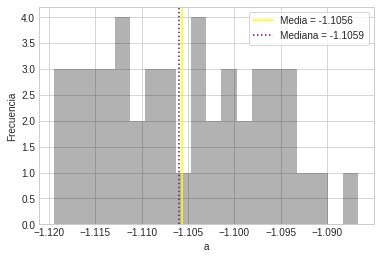

In [21]:
a_total = []

for i in range(caminos):
    for j in range(np.int(len(a[i]) / 2), len(a[i])):
        a_total.append(a[i][j])
plt.hist(a_total, 20, color = 'black', alpha = 0.3)
#plt.axvline(a_0, color = 'red', label = 'Real = {0}'.format(a_0))
plt.axvline(np.mean(a_total), color = 'yellow', label = 'Media = {0}'.format(np.round(np.mean(a_total), 4)))
plt.axvline(np.median(a_total), color = 'purple', linestyle = ':', label = 'Mediana = {0}'.format(np.round(np.median(a_total), 4)))
plt.xlabel('a')
plt.ylabel('Frecuencia')
plt.legend(frameon = True)
plt.show()

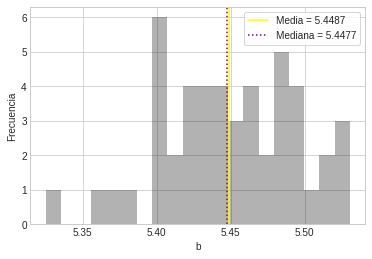

In [23]:
b_total = []

for i in range(caminos):
    for j in range(np.int(len(b[i]) / 2), len(b[i])):
        b_total.append(b[i][j])
plt.hist(b_total, 20, color = 'black', alpha = 0.3)
#plt.axvline(b_0, color = 'red', label = 'Real = {0}'.format(b_0))
plt.axvline(np.mean(b_total), color = 'yellow', label = 'Media = {0}'.format(np.round(np.mean(b_total), 4)))
plt.axvline(np.median(b_total), color = 'purple', linestyle = ':', label = 'Mediana = {0}'.format(np.round(np.median(b_total), 4)))
plt.xlabel('b')
plt.ylabel('Frecuencia')
plt.legend(frameon = True)
plt.show()

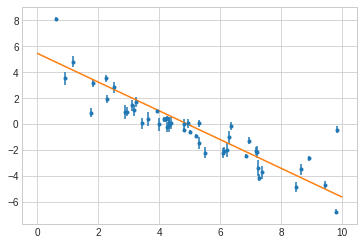

In [32]:
x = np.linspace(0, 10, 100)
plt.errorbar(v[0], v[1], yerr = v[2], fmt='.')
plt.plot(x, recta(x, np.mean(a_total), np.mean(b_total)))

Ahora en lugar de <strong>sigma</strong> como error en la función <strong>chisq,</strong> se cambia a <strong>delta.</strong>

In [34]:
#parametros[2] será el nuevo parámetro libre.
def chisq_n(parametros, data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = recta(x, parametros[0], parametros[1])
    chisq = (y - model) ** 2 / (yerr ** 2 + (parametros[2] ** 2 * model ** 2))
    return chisq.sum()

In [35]:
N = 10000
caminos = 1 #Que sea j el número de caminos.
sigma = 0.2
a_inicial = []
b_inicial = []
f_inicial = []
lh_inicial = []

#Valor inicial de parámetros:
for i in range(caminos):
    a_inicial.append(np.random.normal(-2, sigma))
    b_inicial.append(np.random.normal(8, sigma))
    f_inicial.append(np.random.normal(1, sigma))
    #Valor inicial del likelihood:
    lh_inicial.append(chisq([a_inicial[i], b_inicial[i], f_inicial[i]], [v[0], v[1], v[2]]))

#Arreglos donde se guardarán los valores de a, b, likelihood:
#a = [range(N) for i in range(caminos)]
a = []
b = []
f = []
lh = []

#Se guardan los primeros valores propuestos:
for i in range(caminos):
    a.append([a_inicial[i]])
    b.append([b_inicial[i]])
    f.append([f_inicial[i]])
    lh.append([lh_inicial[i]])

In [36]:
k = 0

for j in range(caminos):
    for i in range(N):
        a_aux = np.random.normal(a[j][k], sigma)#Se generan dos valores random, no importa la distribución en rango [0,10].
        b_aux = np.random.normal(b[j][k], sigma)
        f_aux = np.random.normal(f[j][k], sigma)
        lh_aux = chisq([a_aux, b_aux, f_aux], [v[0], v[1], v[2]]) #Primer comparación para actualización de likelihood.
        if lh_aux < lh_inicial[j]: #La maximización del likelihood equivale a la minimización de chi square.
            #Si se cumple la condición, se agregan a, b y se actualiza el valor del likelihood.
            a[j].append(a_aux)
            b[j].append(b_aux)
            f[j].append(f_aux)
            lh[j].append(lh_aux)
            lh_inicial[j] = lh_aux
            k += 1
        else:
            comparador = np.random.uniform(0, 1)
            if (lh_aux - lh_inicial[j]) < comparador:
                a[j].append(a_aux)
                b[j].append(b_aux)
                f[j].append(f_aux)
                lh[j].append(lh_aux)
                lh_inicial[j] = lh_aux #En esta parte tengo duda, se acepta el valor, pero... ¿se actualiza lh?
                k += 1
            else:
                continue
    k = 0

In [37]:
#El mínimo chi square está en:
parametros = []
for i in range(caminos):
    parametros.append(np.where(lh[i] == np.min(lh[i])))
parametros

[(array([30]),)]

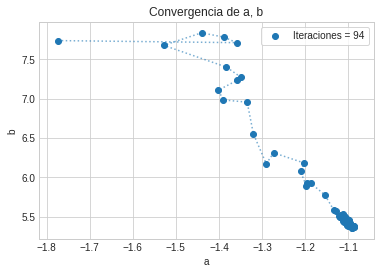

In [38]:
plt.title('Convergencia de a, b')
for i in range(caminos):
    plt.scatter(a[i], b[i], label = 'Iteraciones = {0}'.format(len(a[i])))
    plt.plot(a[i], b[i], linestyle = ':', alpha = 0.6)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.legend(frameon = True)
plt.show()

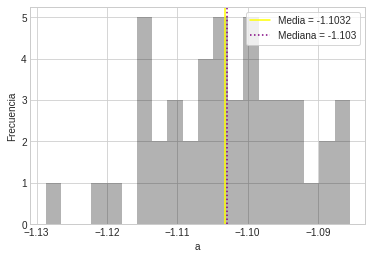

In [39]:
a_total = []

for i in range(caminos):
    for j in range(np.int(len(a[i]) / 2), len(a[i])):
        a_total.append(a[i][j])
plt.hist(a_total, 20, color = 'black', alpha = 0.3)
#plt.axvline(a_0, color = 'red', label = 'Real = {0}'.format(a_0))
plt.axvline(np.mean(a_total), color = 'yellow', label = 'Media = {0}'.format(np.round(np.mean(a_total), 4)))
plt.axvline(np.median(a_total), color = 'purple', linestyle = ':', label = 'Mediana = {0}'.format(np.round(np.median(a_total), 4)))
plt.xlabel('a')
plt.ylabel('Frecuencia')
plt.legend(frameon = True)
plt.show()

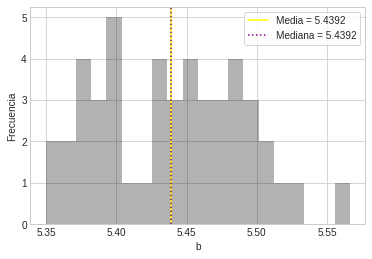

In [40]:
b_total = []

for i in range(caminos):
    for j in range(np.int(len(b[i]) / 2), len(b[i])):
        b_total.append(b[i][j])
plt.hist(b_total, 20, color = 'black', alpha = 0.3)
#plt.axvline(b_0, color = 'red', label = 'Real = {0}'.format(b_0))
plt.axvline(np.mean(b_total), color = 'yellow', label = 'Media = {0}'.format(np.round(np.mean(b_total), 4)))
plt.axvline(np.median(b_total), color = 'purple', linestyle = ':', label = 'Mediana = {0}'.format(np.round(np.median(b_total), 4)))
plt.xlabel('b')
plt.ylabel('Frecuencia')
plt.legend(frameon = True)
plt.show()

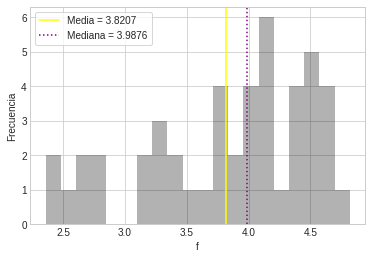

In [42]:
f_total = []

for i in range(caminos):
    for j in range(np.int(len(f[i]) / 2), len(f[i])):
        f_total.append(f[i][j])
plt.hist(f_total, 20, color = 'black', alpha = 0.3)
#plt.axvline(b_0, color = 'red', label = 'Real = {0}'.format(b_0))
plt.axvline(np.mean(f_total), color = 'yellow', label = 'Media = {0}'.format(np.round(np.mean(f_total), 4)))
plt.axvline(np.median(f_total), color = 'purple', linestyle = ':', label = 'Mediana = {0}'.format(np.round(np.median(f_total), 4)))
plt.xlabel('f')
plt.ylabel('Frecuencia')
plt.legend(frameon = True)
plt.show()

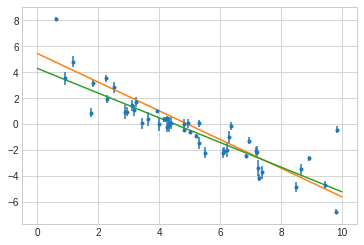

In [43]:
x = np.linspace(0, 10, 100)
plt.errorbar(v[0], v[1], yerr = v[2], fmt='.')
plt.plot(x, recta(x, np.mean(a_total), np.mean(b_total)))
plt.plot(x, recta(x, -0.95, 4.29))